In [5]:
import joblib as joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import History
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from tools import data_parser as dp


In [6]:
bert_data_512 = "../data/combined_bert_df.csv"
bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

In [6]:
def rnn_regression(seq, temp, num_epochs=100, batch_size=10, test_size=0.1):
    """
    :param seq: sequence of amino acids
    :param temp: temperature
    :param num_epochs: number of epochs to train the model for
    :param batch_size: batch size for training the model
    :param test_size: the proportion of the dataset to include in the test split
    :return: model MAE, R-squared and pearson coefficient
    """

    # convert seq and temp to numpy arrays
    seq = seq.values.reshape((seq.shape[0], seq.shape[1], 1))
    temp = np.array(temp)

    # split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(seq, temp, test_size=test_size, random_state=7)

    # create the model
    model = Sequential()
    model.add(LSTM(100, input_shape=(seq.shape[1], seq.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # fit the model
    history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=2, validation_split=0.2)

    # evaluate the model on the test set
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    pearsonr = np.corrcoef(y_test, predictions.T)[0, 1]

    # plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    return mae, r2, pearsonr


Epoch 1/100
64/64 - 2s - loss: 66.5769 - val_loss: 60.2855 - 2s/epoch - 33ms/step
Epoch 2/100
64/64 - 1s - loss: 54.3600 - val_loss: 48.6096 - 568ms/epoch - 9ms/step
Epoch 3/100
64/64 - 1s - loss: 44.8553 - val_loss: 40.4516 - 568ms/epoch - 9ms/step
Epoch 4/100
64/64 - 1s - loss: 36.9910 - val_loss: 32.8292 - 551ms/epoch - 9ms/step
Epoch 5/100
64/64 - 1s - loss: 29.4921 - val_loss: 25.4875 - 582ms/epoch - 9ms/step
Epoch 6/100
64/64 - 1s - loss: 22.2914 - val_loss: 18.4008 - 614ms/epoch - 10ms/step
Epoch 7/100
64/64 - 1s - loss: 15.3404 - val_loss: 11.8379 - 535ms/epoch - 8ms/step
Epoch 8/100
64/64 - 1s - loss: 9.0195 - val_loss: 6.8542 - 567ms/epoch - 9ms/step
Epoch 9/100
64/64 - 1s - loss: 5.5758 - val_loss: 4.8943 - 593ms/epoch - 9ms/step
Epoch 10/100
64/64 - 1s - loss: 4.7447 - val_loss: 4.6101 - 582ms/epoch - 9ms/step
Epoch 11/100
64/64 - 1s - loss: 4.6486 - val_loss: 4.5567 - 558ms/epoch - 9ms/step
Epoch 12/100
64/64 - 1s - loss: 4.6237 - val_loss: 4.5571 - 582ms/epoch - 9ms/step


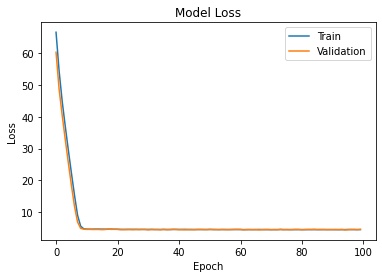

(5.208859422471787, -0.03088277007169915, 0.10454312006703093)

In [7]:
rnn_regression(X,y, batch_size=2)

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [15]:
num_epochs=100
batch_size=10
n_splits=5

In [38]:
# Define the RNN model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rnn', KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0))
])

C:\Users\toon_\AppData\Local\Temp\ipykernel_21596\1242534098.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('rnn', KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0))


In [48]:
X.columns = range(X.shape[1])

In [74]:
y = pd.DataFrame(y)

Epoch 1/100
15/15 - 2s - loss: 70.3704 - val_loss: 69.1454 - 2s/epoch - 134ms/step
Epoch 2/100
15/15 - 0s - loss: 67.8739 - val_loss: 66.4310 - 183ms/epoch - 12ms/step
Epoch 3/100
15/15 - 0s - loss: 64.7575 - val_loss: 62.5358 - 179ms/epoch - 12ms/step
Epoch 4/100
15/15 - 0s - loss: 60.6606 - val_loss: 58.6210 - 157ms/epoch - 10ms/step
Epoch 5/100
15/15 - 0s - loss: 56.9953 - val_loss: 55.2454 - 141ms/epoch - 9ms/step
Epoch 6/100
15/15 - 0s - loss: 53.7958 - val_loss: 52.2469 - 154ms/epoch - 10ms/step
Epoch 7/100
15/15 - 0s - loss: 51.0807 - val_loss: 49.8117 - 139ms/epoch - 9ms/step
Epoch 8/100
15/15 - 0s - loss: 48.7867 - val_loss: 47.6946 - 146ms/epoch - 10ms/step
Epoch 9/100
15/15 - 0s - loss: 46.7613 - val_loss: 45.7704 - 143ms/epoch - 10ms/step
Epoch 10/100
15/15 - 0s - loss: 44.8646 - val_loss: 43.9246 - 155ms/epoch - 10ms/step
Epoch 11/100
15/15 - 0s - loss: 43.0287 - val_loss: 42.0996 - 139ms/epoch - 9ms/step
Epoch 12/100
15/15 - 0s - loss: 41.2072 - val_loss: 40.2924 - 150ms/

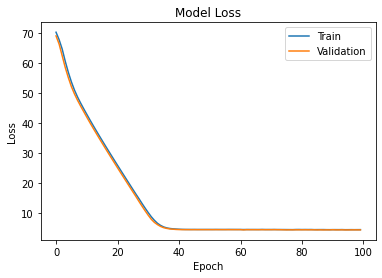

Epoch 1/100
15/15 - 2s - loss: 70.4641 - val_loss: 67.3466 - 2s/epoch - 105ms/step
Epoch 2/100
15/15 - 0s - loss: 67.9029 - val_loss: 64.6121 - 192ms/epoch - 13ms/step
Epoch 3/100
15/15 - 0s - loss: 65.1215 - val_loss: 61.6162 - 162ms/epoch - 11ms/step
Epoch 4/100
15/15 - 0s - loss: 61.7766 - val_loss: 57.7339 - 139ms/epoch - 9ms/step
Epoch 5/100
15/15 - 0s - loss: 57.7876 - val_loss: 54.0666 - 125ms/epoch - 8ms/step
Epoch 6/100
15/15 - 0s - loss: 54.5080 - val_loss: 51.2794 - 141ms/epoch - 9ms/step
Epoch 7/100
15/15 - 0s - loss: 51.9550 - val_loss: 48.8645 - 142ms/epoch - 9ms/step
Epoch 8/100
15/15 - 0s - loss: 49.5627 - val_loss: 46.6792 - 141ms/epoch - 9ms/step
Epoch 9/100
15/15 - 0s - loss: 47.4564 - val_loss: 44.7002 - 126ms/epoch - 8ms/step
Epoch 10/100
15/15 - 0s - loss: 45.5264 - val_loss: 42.8204 - 129ms/epoch - 9ms/step
Epoch 11/100
15/15 - 0s - loss: 43.6684 - val_loss: 40.9901 - 110ms/epoch - 7ms/step
Epoch 12/100
15/15 - 0s - loss: 41.8561 - val_loss: 39.2045 - 127ms/epoch

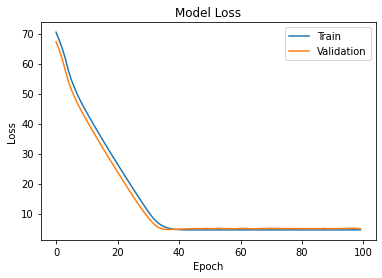

Epoch 1/100
15/15 - 1s - loss: 69.4458 - val_loss: 70.1443 - 1s/epoch - 94ms/step
Epoch 2/100
15/15 - 0s - loss: 67.0578 - val_loss: 67.4873 - 178ms/epoch - 12ms/step
Epoch 3/100
15/15 - 0s - loss: 63.8265 - val_loss: 63.5875 - 157ms/epoch - 10ms/step
Epoch 4/100
15/15 - 0s - loss: 59.7635 - val_loss: 59.5733 - 142ms/epoch - 9ms/step
Epoch 5/100
15/15 - 0s - loss: 56.0997 - val_loss: 56.2679 - 126ms/epoch - 8ms/step
Epoch 6/100
15/15 - 0s - loss: 53.0987 - val_loss: 53.5198 - 143ms/epoch - 10ms/step
Epoch 7/100
15/15 - 0s - loss: 50.4960 - val_loss: 51.0163 - 125ms/epoch - 8ms/step
Epoch 8/100
15/15 - 0s - loss: 48.0769 - val_loss: 48.7029 - 141ms/epoch - 9ms/step
Epoch 9/100
15/15 - 0s - loss: 45.9281 - val_loss: 46.7253 - 143ms/epoch - 10ms/step
Epoch 10/100
15/15 - 0s - loss: 44.0105 - val_loss: 44.8612 - 125ms/epoch - 8ms/step
Epoch 11/100
15/15 - 0s - loss: 42.1731 - val_loss: 43.0541 - 126ms/epoch - 8ms/step
Epoch 12/100
15/15 - 0s - loss: 40.3849 - val_loss: 41.2880 - 125ms/epoc

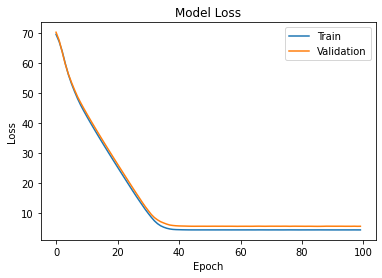

Epoch 1/100
15/15 - 2s - loss: 70.0231 - val_loss: 68.4900 - 2s/epoch - 101ms/step
Epoch 2/100
15/15 - 0s - loss: 67.6616 - val_loss: 66.0759 - 188ms/epoch - 13ms/step
Epoch 3/100
15/15 - 0s - loss: 65.0194 - val_loss: 63.0646 - 165ms/epoch - 11ms/step
Epoch 4/100
15/15 - 0s - loss: 61.5292 - val_loss: 58.8294 - 157ms/epoch - 10ms/step
Epoch 5/100
15/15 - 0s - loss: 57.6193 - val_loss: 55.2694 - 142ms/epoch - 9ms/step
Epoch 6/100
15/15 - 0s - loss: 54.3428 - val_loss: 52.2750 - 131ms/epoch - 9ms/step
Epoch 7/100
15/15 - 0s - loss: 51.5140 - val_loss: 49.7573 - 143ms/epoch - 10ms/step
Epoch 8/100
15/15 - 0s - loss: 49.1273 - val_loss: 47.5979 - 141ms/epoch - 9ms/step
Epoch 9/100
15/15 - 0s - loss: 47.0296 - val_loss: 45.6009 - 158ms/epoch - 11ms/step
Epoch 10/100
15/15 - 0s - loss: 45.0633 - val_loss: 43.6397 - 140ms/epoch - 9ms/step
Epoch 11/100
15/15 - 0s - loss: 43.1090 - val_loss: 41.7477 - 141ms/epoch - 9ms/step
Epoch 12/100
15/15 - 0s - loss: 41.2548 - val_loss: 39.9227 - 126ms/ep

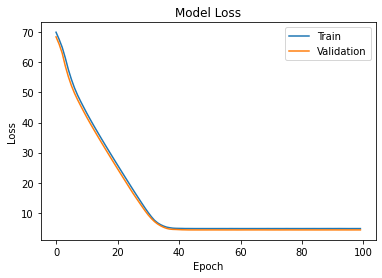

Epoch 1/100
15/15 - 1s - loss: 69.1057 - val_loss: 67.6201 - 1s/epoch - 96ms/step
Epoch 2/100
15/15 - 0s - loss: 66.5852 - val_loss: 65.0525 - 186ms/epoch - 12ms/step
Epoch 3/100
15/15 - 0s - loss: 63.6708 - val_loss: 61.5590 - 174ms/epoch - 12ms/step
Epoch 4/100
15/15 - 0s - loss: 59.7085 - val_loss: 57.2248 - 161ms/epoch - 11ms/step
Epoch 5/100
15/15 - 0s - loss: 55.2773 - val_loss: 53.4172 - 172ms/epoch - 11ms/step
Epoch 6/100
15/15 - 0s - loss: 51.9078 - val_loss: 50.3840 - 155ms/epoch - 10ms/step
Epoch 7/100
15/15 - 0s - loss: 49.1137 - val_loss: 47.8077 - 165ms/epoch - 11ms/step
Epoch 8/100
15/15 - 0s - loss: 46.7182 - val_loss: 45.5293 - 160ms/epoch - 11ms/step
Epoch 9/100
15/15 - 0s - loss: 44.5968 - val_loss: 43.5091 - 155ms/epoch - 10ms/step
Epoch 10/100
15/15 - 0s - loss: 42.6447 - val_loss: 41.6035 - 159ms/epoch - 11ms/step
Epoch 11/100
15/15 - 0s - loss: 40.7724 - val_loss: 39.7610 - 161ms/epoch - 11ms/step
Epoch 12/100
15/15 - 0s - loss: 38.9528 - val_loss: 37.9640 - 150m

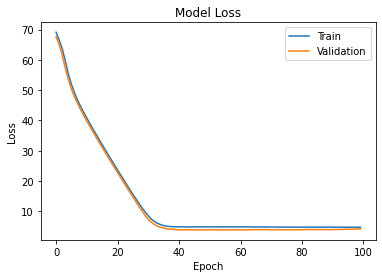

MAE: 4.719 (0.525)
R2: -0.061 (0.072)


In [81]:
mae_scores = []
r2_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # create the RNN model
    X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    model = Sequential()
    model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # fit the model
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=2, validation_data=(X_test, y_test))

    # evaluate the model on the test set
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    mae_scores.append(mae)
    r2_scores.append(r2)

    # plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

print('MAE: %.3f (%.3f)' % (np.mean(mae_scores), np.std(mae_scores)))
print('R2: %.3f (%.3f)' % (np.mean(r2_scores), np.std(r2_scores)))

Epoch 1/100
15/15 - 3s - loss: 70.5992 - val_loss: 69.7644 - 3s/epoch - 190ms/step
Epoch 2/100
15/15 - 0s - loss: 68.5869 - val_loss: 67.6161 - 168ms/epoch - 11ms/step
Epoch 3/100
15/15 - 0s - loss: 66.0669 - val_loss: 64.5022 - 163ms/epoch - 11ms/step
Epoch 4/100
15/15 - 0s - loss: 62.3574 - val_loss: 60.1151 - 194ms/epoch - 13ms/step
Epoch 5/100
15/15 - 0s - loss: 58.0586 - val_loss: 56.0248 - 195ms/epoch - 13ms/step
Epoch 6/100
15/15 - 0s - loss: 54.3938 - val_loss: 52.7440 - 213ms/epoch - 14ms/step
Epoch 7/100
15/15 - 0s - loss: 51.4807 - val_loss: 50.1420 - 203ms/epoch - 14ms/step
Epoch 8/100
15/15 - 0s - loss: 49.0254 - val_loss: 47.8568 - 192ms/epoch - 13ms/step
Epoch 9/100
15/15 - 0s - loss: 46.8596 - val_loss: 45.8063 - 179ms/epoch - 12ms/step
Epoch 10/100
15/15 - 0s - loss: 44.8725 - val_loss: 43.8963 - 190ms/epoch - 13ms/step
Epoch 11/100
15/15 - 0s - loss: 42.9892 - val_loss: 42.0476 - 172ms/epoch - 11ms/step
Epoch 12/100
15/15 - 0s - loss: 41.1603 - val_loss: 40.2431 - 169

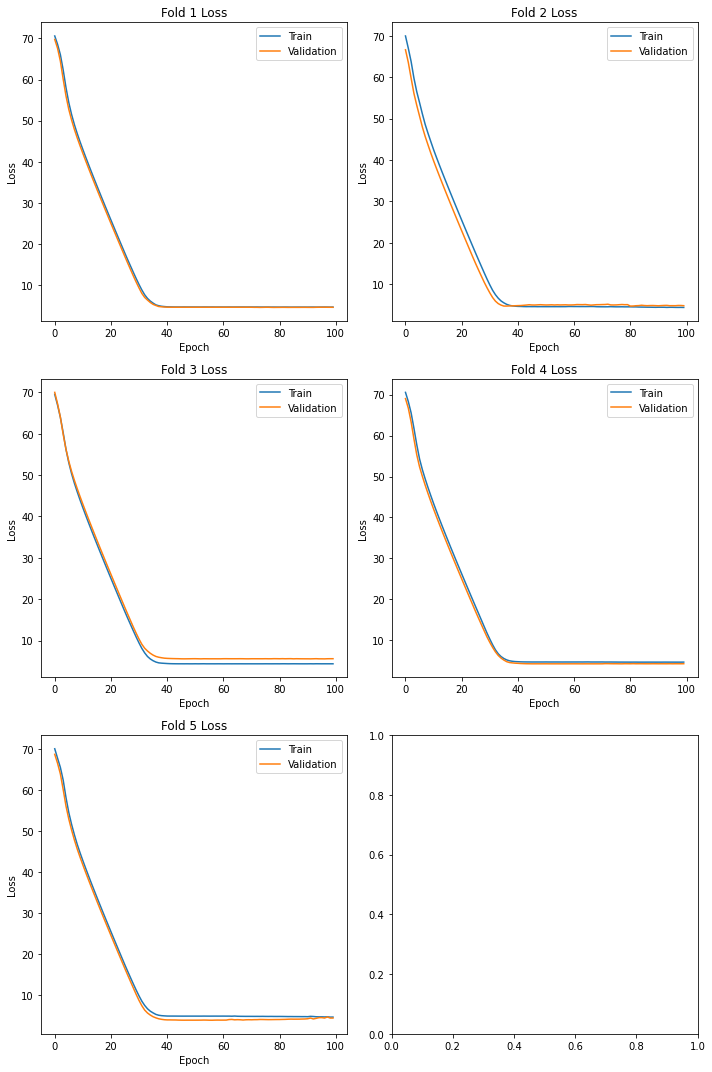

MAE: 4.750 (0.479)
R2: -0.110 (0.181)
Pearsonr: 0.093 (0.101)


In [88]:
# set up the subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axs = axs.flatten()

mae_scores = []
r2_scores = []
pearsonr_scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # create the RNN model
    X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    model = Sequential()
    model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # fit the model
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=2, validation_data=(X_test, y_test))

    # evaluate the model on the test set
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # y_test and predictions are arrays with shape (36, 1)
    y_test_reshaped = np.squeeze(y_test)
    predictions_reshaped = np.squeeze(predictions)

    # Calculate Pearson correlation coefficient
    pearson, _ = pearsonr(y_test_reshaped, predictions_reshaped)

    mae_scores.append(mae)
    r2_scores.append(r2)
    pearsonr_scores.append(pearson)

    # plot training and validation loss on the appropriate subplot
    axs[i].plot(history.history['loss'])
    axs[i].plot(history.history['val_loss'])
    axs[i].set_title(f'Fold {i+1} Loss')
    axs[i].set_ylabel('Loss')
    axs[i].set_xlabel('Epoch')
    axs[i].legend(['Train', 'Validation'], loc='upper right')

# adjust the layout and display the plots
plt.tight_layout()
plt.show()

print('MAE: %.3f (%.3f)' % (np.mean(mae_scores), np.std(mae_scores)))
print('R2: %.3f (%.3f)' % (np.mean(r2_scores), np.std(r2_scores)))
print('Pearsonr: %.3f (%.3f)' % (np.mean(pearsonr_scores), np.std(pearsonr_scores)))

In [89]:
import numpy as np
from scipy.stats import stats
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [113]:
def svm_cv(X, y):
    # set up the subplots
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
    axs = axs.flatten()

    mae_scores = []
    r2_scores = []
    pearsonr_scores = []

    # set up the k-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for i, (train_index, test_index) in enumerate(kf.split(X)):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # create the SVM model
        model = SVR(kernel='rbf', C=3.4597293624374235, gamma='scale')

        # fit the model
        model.fit(X_train, y_train)

        # evaluate the model on the test set
        predictions = model.predict(X_test)
        mae         = mean_absolute_error(y_test, predictions)
        r2          = r2_score(y_test, predictions)

        # y_test and predictions are arrays with shape (36, 1)
        y_test_reshaped = np.squeeze(y_test)
        predictions_reshaped = np.squeeze(predictions)

        # Calculate Pearson correlation coefficient
        pearson, _ = pearsonr(y_test_reshaped, predictions_reshaped)

        mae_scores.append(mae)
        r2_scores.append(r2)
        pearsonr_scores.append(pearson)

        # scatter plot predictions vs. actual values on the appropriate subplot
        axs[i].scatter(y_test, predictions)
        axs[i].set_title(f'Fold {i+1} Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearson:.2f}')
        axs[i].set_ylabel('Actual')
        axs[i].set_xlabel('Predictions')
        axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

    # print the model's mean and standard dev performance metrics
    print('MAE: %.3f (%.3f)' % (np.mean(mae_scores), np.std(mae_scores)))
    print('R2: %.3f (%.3f)' % (np.mean(r2_scores), np.std(r2_scores)))
    print('Pearsonr: %.3f (%.3f)' % (np.mean(pearsonr_scores), np.std(pearsonr_scores)))

    return model

MAE: 4.159 (0.686)
R2: 0.157 (0.134)
Pearsonr: 0.445 (0.162)


C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWar

SVR(C=3.4597293624374235)

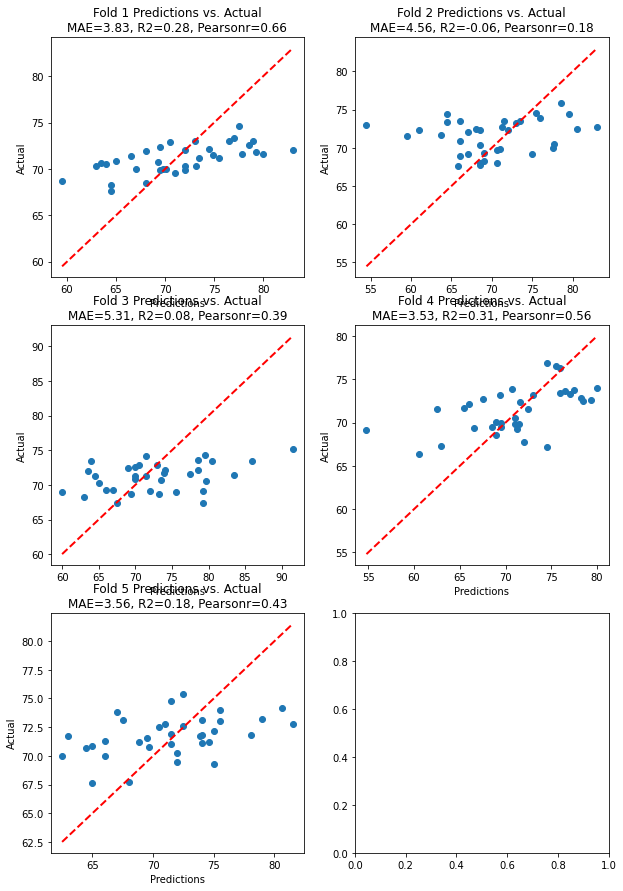

In [114]:
svm_cv(X,y)

In [176]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


def svm_cv(X, y):

    rand = 28

    # set up train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand)

    # set up the subplots
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
    axs = axs.flatten()
    plt.subplots_adjust(hspace=0.5)

    mae_scores = []
    r2_scores = []
    pearsonr_scores = []

    # set up the k-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=rand)

    best_model = None
    best_score = -np.inf

    for i, (train_index, val_index) in enumerate(kf.split(X_train)):

        k_X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        k_y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # create the SVM model
        model = SVR(kernel='rbf')

        # define the parameter grid to search over
        param_dist = {'C': uniform(loc=0, scale=1000),
                  'gamma': ['scale', 'auto'] + list(np.logspace(-5, 2, 10))}

        # set up the randomized search
        random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=kf, n_jobs=-1)

        random_search.fit(k_X_train, k_y_train)

        # evaluate the model on the test set
        predictions = random_search.predict(X_val)
        mae         = mean_absolute_error(y_val, predictions)
        r2          = r2_score(y_val, predictions)


        y_val_reshaped = np.squeeze(y_val)
        predictions_reshaped = np.squeeze(predictions)

        # Calculate Pearson correlation coefficient
        pearsonr    = stats.pearsonr(y_val_reshaped, predictions_reshaped)

        # keep track of the best model based on validation score
        if r2 > best_score:
            best_score = r2
            best_model = model

        mae_scores.append(mae)
        r2_scores.append(r2)
        pearsonr_scores.append(pearsonr)

        # scatter plot predictions vs. actual values on the appropriate subplot
        axs[i].scatter(y_val, predictions)
        axs[i].set_title(f'Fold {i+1} Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearson:.2f}')
        axs[i].set_ylabel('Actual')
        axs[i].set_xlabel('Predictions')
        axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)


    # print the model's mean and standard dev performance metrics
    print('Validation MAE: %.3f (%.3f)' % (np.mean(mae_scores), np.std(mae_scores)))
    print('Validation R2: %.3f (%.3f)' % (np.mean(r2_scores), np.std(r2_scores)))
    print('Validation Pearsonr: %.3f (%.3f)' % (np.mean(pearsonr_scores), np.std(pearsonr_scores)))

    best_model.fit(X_train, y_train)

    y_pred      = best_model.predict(X_test)
    mae         = mean_absolute_error(y_test, y_pred)
    r2          = r2_score(y_test, y_pred)

    y_pred_reshaped = np.squeeze(y_pred)
    y_test_reshaped = np.squeeze(y_test)
    pearsonr = stats.pearsonr(y_pred_reshaped, y_test_reshaped)

    # print the best models performance metrics
    print('Test MAE: %.3f' % mae)
    print('Test R2: %.3f' % r2)
    print('Test Pearsonr: %.3f' % pearsonr[0])

    # scatter plot for test set predictions vs. actual values
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred)
    plt.title(f'Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearsonr[0]:.2f}')
    plt.ylabel('Actual')
    plt.xlabel('Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

    return model

C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\AppData\Local\Temp\ipykernel_21596\1272195406.py:54: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  pearsonr    = stats.pearsonr(y_val_reshaped, predictions_reshaped)
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\AppData\Local\Temp\ipykernel_21596\1272195406.py:54: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `sci

Validation MAE: 4.164 (1.204)
Validation R2: -0.112 (0.406)
Validation Pearsonr: 0.313 (0.253)
Test MAE: 3.942
Test R2: 0.230
Test Pearsonr: 0.692


C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\AppData\Local\Temp\ipykernel_21596\1272195406.py:54: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  pearsonr    = stats.pearsonr(y_val_reshaped, predictions_reshaped)
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\AppData\Local\Temp\ipykernel_21596\1272195406.py:86: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `sci

SVR()

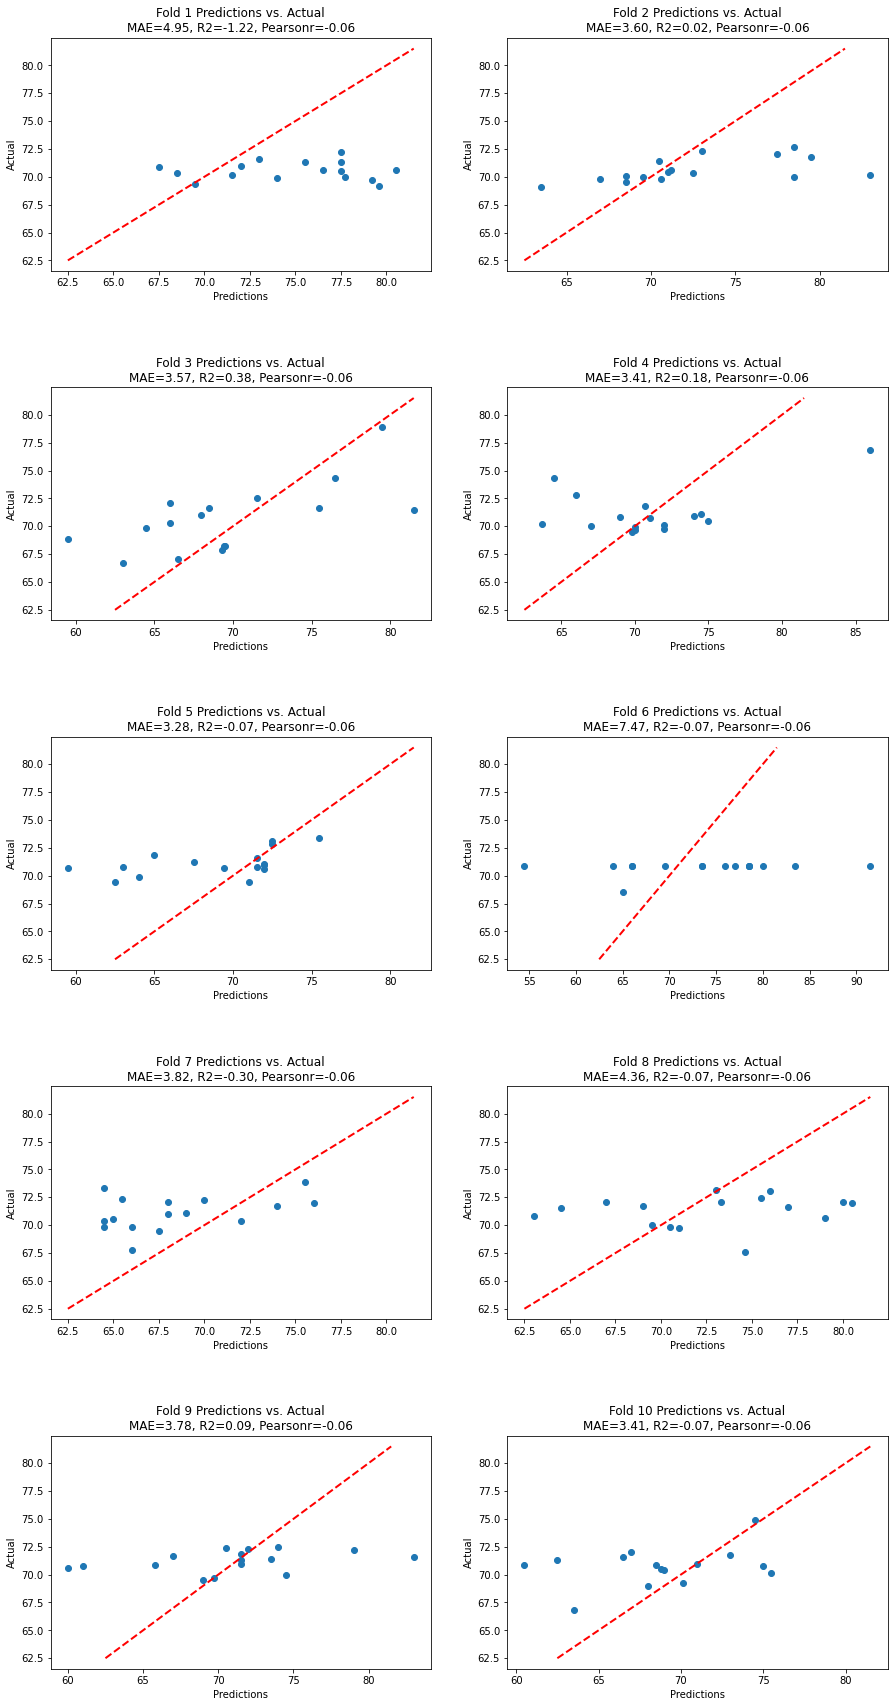

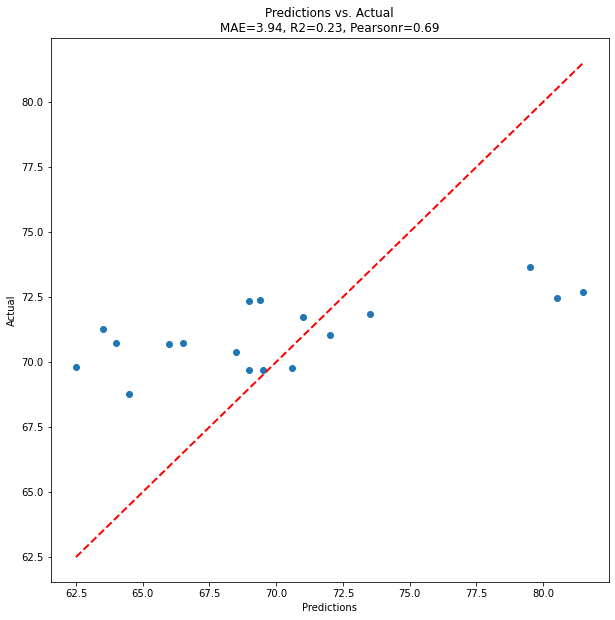

In [177]:
svm_cv(X,y)

In [20]:
rand = 676

bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp



In [ ]:
# set up train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand)

In [8]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [9]:
joblib.dump(scaler, '../models/150423_standscaler.joblib')

['../models/150423_standscaler.joblib']

AttributeError: 'list' object has no attribute 'iloc'

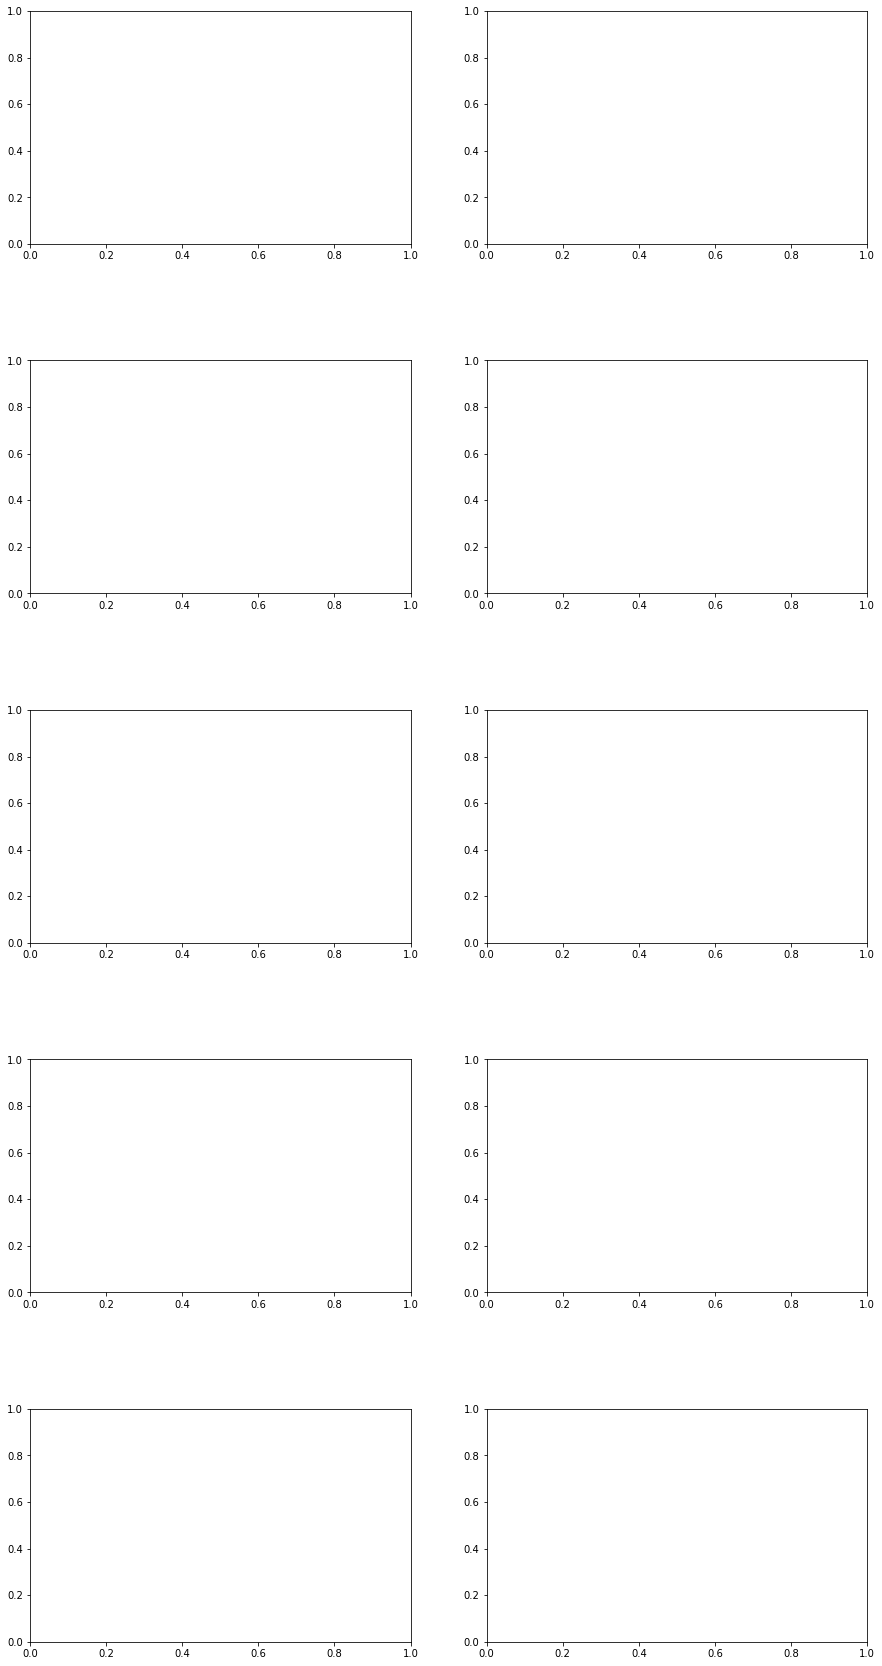

In [21]:
def svm_cv(X, y):

    rand = 676

    # set up train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand)

    scaler = StandardScaler()

    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # set up the subplots
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
    axs = axs.flatten()
    plt.subplots_adjust(hspace=0.5)

    mae_scores = []
    r2_scores = []
    pearsonr_scores = []

    # set up the k-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=rand)

    best_model = None
    best_score = -np.inf

    for i, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):

        k_X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        k_y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # create the SVM model
        model = SVR(kernel='rbf')

        # define the parameter grid to search over
        param_dist = {'C': uniform(loc=0, scale=1000),
                      'gamma': ['scale', 'auto'] + list(np.logspace(-5, 2, 10))}

        # set up the randomized search
        random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=kf, n_jobs=-1)

        random_search.fit(k_X_train, k_y_train)

        # evaluate the model on the test set
        predictions = random_search.predict(X_val)
        mae         = mean_absolute_error(y_val, predictions)
        r2          = r2_score(y_val, predictions)

        # y_test and predictions are arrays with shape (36, 1)
        y_val_reshaped = np.squeeze(y_val)
        predictions_reshaped = np.squeeze(predictions)

        # Calculate Pearson correlation coefficient
        pearsonr    = stats.pearsonr(y_val_reshaped, predictions_reshaped)

        # keep track of the best model based on validation score
        if r2 > best_score:
            best_score = r2
            best_model = model

        mae_scores.append(mae)
        r2_scores.append(r2)
        pearsonr_scores.append(pearsonr)

        # scatter plot predictions vs. actual values on the appropriate subplot
        axs[i].scatter(y_val, predictions)
        axs[i].set_title(f'Fold {i+1} Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearson:.2f}')
        axs[i].set_ylabel('Actual')
        axs[i].set_xlabel('Predictions')
        axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)


    # print the model's mean and standard dev performance metrics
    print('Validation MAE: %.3f (%.3f)' % (np.mean(mae_scores), np.std(mae_scores)))
    print('Validation R2: %.3f (%.3f)' % (np.mean(r2_scores), np.std(r2_scores)))
    print('Validation Pearsonr: %.3f (%.3f)' % (np.mean(pearsonr_scores), np.std(pearsonr_scores)))

    best_model.fit(X_train_scaled, y_train)

    y_pred      = best_model.predict(X_test_scaled)
    mae         = mean_absolute_error(y_test, y_pred)
    r2          = r2_score(y_test, y_pred)

    y_pred_reshaped = np.squeeze(y_pred)
    y_test_reshaped = np.squeeze(y_test)
    pearsonr = stats.pearsonr(y_pred_reshaped, y_test_reshaped)

    # print the best models performance metrics
    print('Test MAE: %.3f' % mae)
    print('Test R2: %.3f' % r2)
    print('Test Pearsonr: %.3f' % pearsonr[0])

    # scatter plot for test set predictions vs. actual values
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred)
    plt.title(f'Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearsonr[0]:.2f}')
    plt.ylabel('Actual')
    plt.xlabel('Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

    return best_model

svm_cv(X,y)

C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\AppData\Local\Temp\ipykernel_21596\1741977814.py:57: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  pearsonr    = stats.pearsonr(y_val_reshaped, predictions_reshaped)
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toon_\AppData\Local\Temp\ipykernel_21596\1741977814.py:57: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `sci

Validation MAE: 4.164 (0.872)
Validation R2: 0.069 (0.074)
Validation Pearsonr: 0.300 (0.216)
Test MAE: 3.228
Test R2: 0.210
Test Pearsonr: 0.648


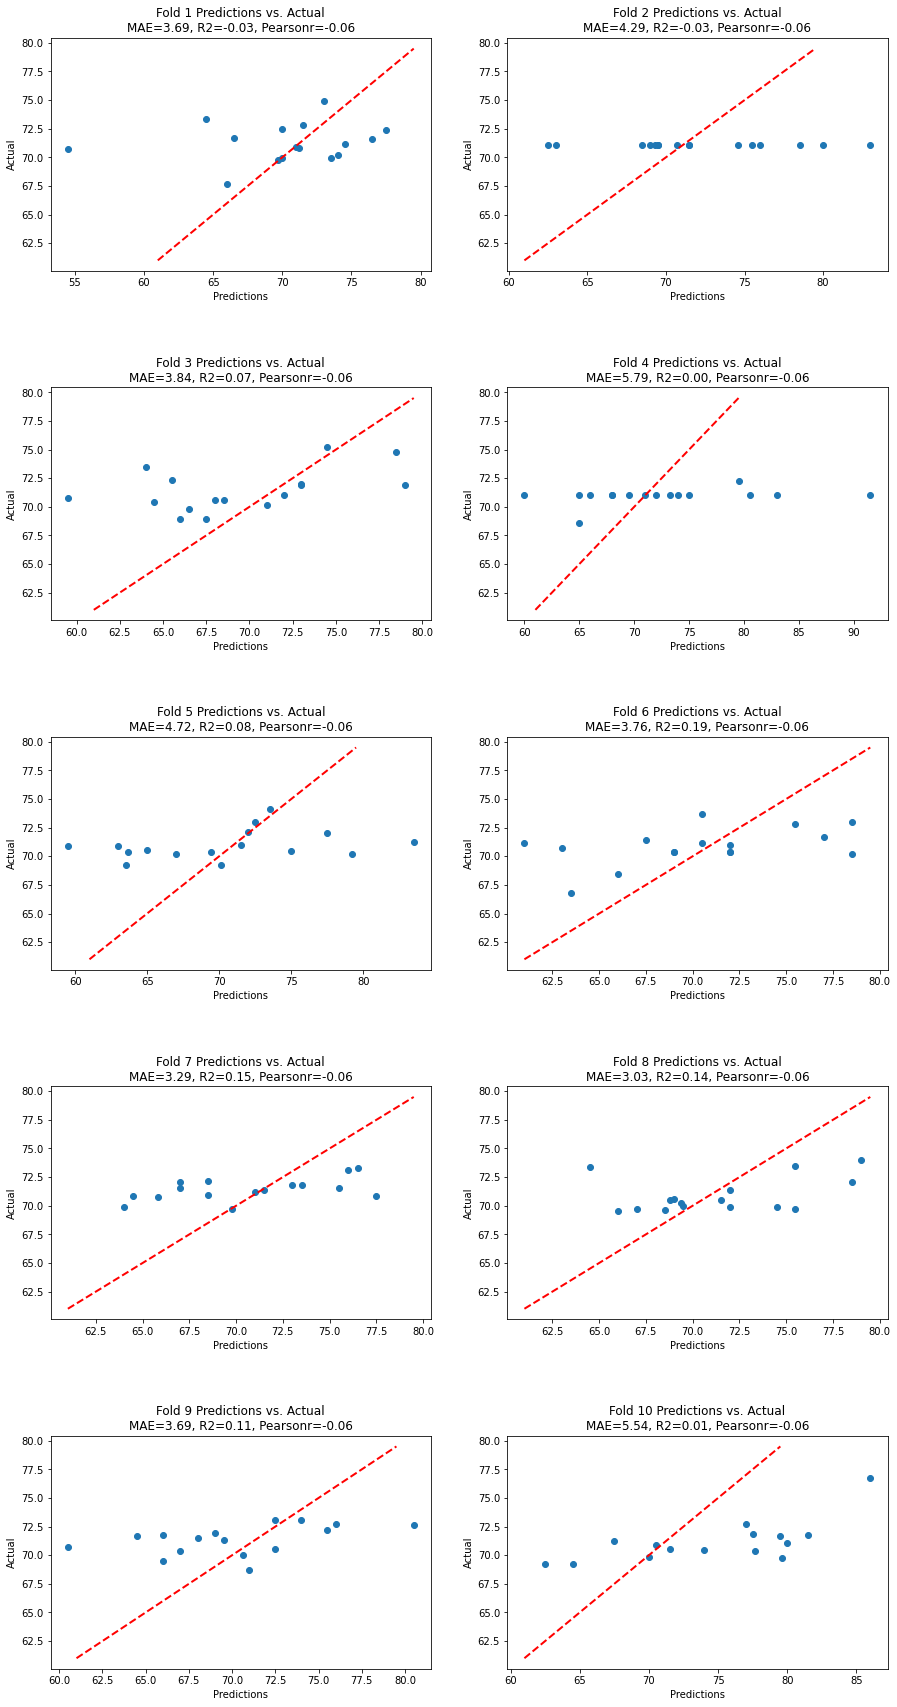

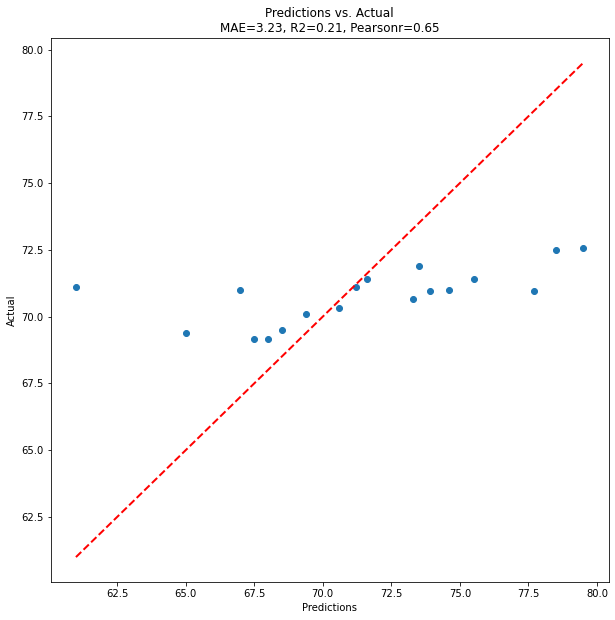

In [277]:
svm_model = svm_cv(X,y)

In [279]:
import joblib

joblib.dump(svm_model, '../models/150423_svm.joblib')

['../models/150423_svm.joblib']

In [26]:
data72.columns

Index(['4', '13', '31', '34', '52', '53', '56', '62', '75', '82', '86', '96',
       '100', '104', '109', '114', '116', '128', '134', '138', '141', '150',
       '152', '159', '160', '161', '183', '188', '195', '200', '205', '216',
       '221', '228', '229', '237', '238', '246', '258', '262', '269', '271',
       '280', '297', '300', '318', '320', '323', '330', '333', '347', '351',
       '358', '378', '390', '395', '401', '404', '408', '411', '425', '426',
       '434', '441', '451', '464', '472', '476', '485', '495', '508', '511'],
      dtype='object')

In [12]:
data72 = pd.read_csv('../data/combined_datasets_72.csv')

selected_features = data72.columns

def select_columns(X):
    # Replace this list with the names of the columns you want to select

    X.columns = ['{}'.format(i) for i in range(len(X.columns))]
    X_new = X[selected_features]
    return X_new

In [16]:
type(svm)

sklearn.svm._classes.SVR

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import joblib
from AntiBERTy import AntiBERTyEncoder
import pandas as pd

# load models
svm = joblib.load('../models/150423_svm.joblib')

# svm pipeline with standard scaler
svm_pipe = Pipeline([
    ('encoder', AntiBERTyEncoder()),
    ('selector', FunctionTransformer(select_columns)),
    ('scaler', scaler),
    ('svm', svm)])




    The code, data, and weights for this work are made available for non-commercial use 
    (including at commercial entities) under the terms of the JHU Academic Software License 
    Agreement. For commercial inquiries, please contact dmalon11[at]jhu.edu.
    License: https://github.com/Graylab/IgFold/blob/main/LICENSE.md
    
Loading 4 IgFold models...
Using device: cpu
Loading C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\Lib\site-packages\igfold\trained_models/IgFold\igfold_1.ckpt...
Loading C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\Lib\site-packages\igfold\trained_models/IgFold\igfold_2.ckpt...
Loading C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\Lib\site-packages\igfold\trained_models/IgFold\igfold_3.ckpt...
Loading C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\Lib\site-packages\igfold\trained_models/IgFold\igfold_5.ckpt...
Successfully loaded 4 IgFold models.
Loaded AntiBERTy model.


In [14]:
X = ('ELQMTQSPASLAVSLGQRATISCKASQSVDYDGDSYMNWYQQKPGQPPKLLIYAASNLESGIPARFSGSGSRTDFTLTINPVETDDVATYYCQQSHEDPYTFGGGTKLEIK', 'LESGAELVKPGASVKLSCKASGYIFTTYWMQWVKQRPGQGLEWIGEIHPSNGLTNYNEKFKSKATLTVDKSSTTAYMQLSSLTSEDSAVYYCSKGRELGRFAYWGQGTLVTVSA')

In [18]:
print(svm_pipe.predict(X))

Completed embedding in 2.98 seconds.


NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [293]:
X = ('ELQMTQSPASLAVSLGQRATISCKASQSVDYDGDSYMNWYQQKPGQPPKLLIYAASNLESGIPARFSGSGSRTDFTLTINPVETDDVATYYCQQSHEDPYTFGGGTKLEIK', 'LESGAELVKPGASVKLSCKASGYIFTTYWMQWVKQRPGQGLEWIGEIHPSNGLTNYNEKFKSKATLTVDKSSTTAYMQLSSLTSEDSAVYYCSKGRELGRFAYWGQGTLVTVSA')

heavy, light = X
sequences = {"H": heavy, "L": light}
print (sequences)

{'H': 'ELQMTQSPASLAVSLGQRATISCKASQSVDYDGDSYMNWYQQKPGQPPKLLIYAASNLESGIPARFSGSGSRTDFTLTINPVETDDVATYYCQQSHEDPYTFGGGTKLEIK', 'L': 'LESGAELVKPGASVKLSCKASGYIFTTYWMQWVKQRPGQGLEWIGEIHPSNGLTNYNEKFKSKATLTVDKSSTTAYMQLSSLTSEDSAVYYCSKGRELGRFAYWGQGTLVTVSA'}


In [289]:
for a,b in X:
    print(a)
    print(b)

ValueError: too many values to unpack (expected 2)

In [285]:
len(X)

2

In [7]:
df = pd.read_csv('../data/combined_bert_df.csv')

In [8]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '502', '503', '504', '505', '506', '507', '508', '509', '510', '511'],
      dtype='object', length=512)

In [9]:
selected_features

Index(['4', '13', '31', '34', '52', '53', '56', '62', '75', '82', '86', '96',
       '100', '104', '109', '114', '116', '128', '134', '138', '141', '150',
       '152', '159', '160', '161', '183', '188', '195', '200', '205', '216',
       '221', '228', '229', '237', '238', '246', '258', '262', '269', '271',
       '280', '297', '300', '318', '320', '323', '330', '333', '347', '351',
       '358', '378', '390', '395', '401', '404', '408', '411', '425', '426',
       '434', '441', '451', '464', '472', '476', '485', '495', '508', '511'],
      dtype='object')

In [10]:
df[selected_features]

,4,13,31,34,52,53,56,62,75,82,...,434,441,451,464,472,476,485,495,508,511
0,-29.141940,-11.528331,-143.155170,107.593940,-44.526806,0.528456,42.838710,81.244380,16.177069,-41.486730,...,111.09079,-69.724060,-94.094090,11.622316,16.300495,96.385890,10.527961,-50.240147,13.266889,101.221860
1,84.637405,161.983290,-79.785250,150.757980,-66.567620,140.765200,75.919586,-34.040672,-76.232930,-66.692690,...,345.29916,-4.309899,-77.737390,-8.781374,-106.667120,-40.479317,46.701714,-73.757904,10.331673,36.679665
2,31.603592,246.895390,7.157277,123.615974,-26.929350,34.784454,114.004960,-18.788340,28.471226,30.032003,...,266.45840,-39.091260,16.124104,51.578980,-44.444218,1.496801,-32.732315,-64.446144,54.983738,25.961790
3,265.647060,23.445145,-136.177260,143.916280,-116.791340,160.164340,12.813471,27.227333,61.147842,103.804790,...,218.42584,-125.526100,3.252994,-30.185379,36.616356,17.927720,-104.530870,-60.669160,178.540830,92.937530
4,-5.213447,-42.506924,9.523516,173.188860,-12.029865,152.627980,95.537160,-17.649742,26.673891,-75.413120,...,313.12732,-116.810780,35.905895,-112.568830,-105.216705,9.410617,31.512688,-7.415275,-78.872030,-32.607390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,62.723007,33.959984,-66.831020,71.336970,-15.538242,96.123160,14.908083,-39.385548,17.548166,-70.920180,...,331.29170,-76.066740,-36.919758,14.659348,-164.339920,-6.198629,4.164231,7.404731,10.877684,-75.318214
173,169.700040,84.841630,-37.473698,131.615280,-123.604740,168.621320,102.215910,-92.709360,-31.661682,14.268283,...,302.22470,2.180474,-103.198074,-96.085230,-95.871820,-35.171387,-147.325040,44.418762,-41.386845,-6.366283
174,184.618960,12.728186,-75.403270,63.147130,-1.373313,130.051600,45.251610,-63.482260,36.350407,77.906540,...,309.47195,48.584824,-127.491520,-93.650665,-132.252730,40.332787,-72.932020,-68.773700,1.562822,-0.364858
175,-76.434875,100.337470,-30.917038,90.000145,-26.048983,150.556880,61.535290,-70.866920,-34.400970,-90.756546,...,209.27138,42.372288,-112.927830,-162.444020,-129.733320,0.408721,98.527405,-97.737780,55.832733,-23.999693


In [6]:
bert_data_512 = "../data/combined_bert_df.csv"
bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

In [11]:
import statistics as st
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats



def svm_cv(X, y):

    """

    :param X: Features
    :param y: Labels
    :return: Best model
    """

    rand = 403

    y = pd.DataFrame(y)
    y = y.values.ravel()

    X.columns = ['{}'.format(i) for i in range(len(X.columns))]

    # set up train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand)

    scaler = StandardScaler()
    scaler.fit(X_train)

# Transform the training and test data using the scaler
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # set up the subplots
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
    axs = axs.flatten()
    plt.subplots_adjust(hspace=0.5)

    mae_scores = []
    r2_scores = []
    pearsonr_scores = []

    # set up the k-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=rand)

    best_model = None
    best_score = -np.inf

    for i, (train_index, val_index) in enumerate(kf.split(X_train)):

        k_X_train, X_val    = X_train.iloc[train_index], X_train.iloc[val_index]
        k_y_train, y_val    = y_train[train_index], y_train[val_index]

        # create the SVM model
        model = SVR(kernel='rbf')
        # define the parameter grid to search over
        param_dist      = {'C': uniform(loc=0, scale=100), 'gamma': ['scale', 'auto'] + list(np.logspace(-5, 2, 8))}

        # set up the randomized search
        random_search   = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=kf, n_jobs=-1)

        random_search.fit(k_X_train, k_y_train)

        # evaluate the model on the test set
        predictions     = random_search.predict(X_val)
        mae             = mean_absolute_error(y_val, predictions)
        r2              = r2_score(y_val, predictions)

        # y_test and predictions are arrays with shape (36, 1)
        y_val_reshaped          = np.squeeze(y_val)
        predictions_reshaped    = np.squeeze(predictions)

        # Calculate Pearson correlation coefficient
        pearsonr        = stats.pearsonr(y_val_reshaped, predictions_reshaped)

        # keep track of the best model based on validation score
        if r2 > best_score:
            best_score  = r2
            best_model  = model

        mae_scores.append(mae)
        r2_scores.append(r2)
        pearsonr_scores.append(pearsonr[0])

        # scatter plot predictions vs. actual values on the appropriate subplot
        axs[i].scatter(y_val, predictions)
        axs[i].set_title(f'Fold {i+1} Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearsonr[0]:.2f}')
        axs[i].set_ylabel('Actual')
        axs[i].set_xlabel('Predictions')
        axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

    # print the model's mean and standard dev performance metrics
    print('Validation MAE: %.3f (%.3f)' % ((st.mean(mae_scores)), st.stdev(mae_scores)))
    print('Validation R2: %.3f (%.3f)' % ((st.mean(r2_scores)), st.stdev(r2_scores)))
    print('Validation Pearsonr: %.3f (%.3f)' % ((st.mean(pearsonr_scores)), (st.stdev(pearsonr_scores))))

    best_model.fit(X_train, y_train)

    y_pred              = best_model.predict(X_test)
    mae                 = mean_absolute_error(y_test, y_pred)
    r2                  = r2_score(y_test, y_pred)

    y_pred_reshaped     = np.squeeze(y_pred)
    y_test_reshaped     = np.squeeze(y_test)
    pearsonr            = stats.pearsonr(y_pred_reshaped, y_test_reshaped)

    # print the best models performance metrics
    print('Test MAE: %.3f' % mae)
    print('Test R2: %.3f' % r2)
    print('Test Pearsonr: %.3f' % pearsonr[0])
    print(y_pred)

    # scatter plot for test set predictions vs. actual values
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred)
    plt.title(f'Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearsonr[0]:.2f}')
    plt.ylabel('Actual')
    plt.xlabel('Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

    return best_model

Validation MAE: 4.326 (0.935)
Validation R2: 0.100 (0.210)
Validation Pearsonr: 0.451 (0.173)
Test MAE: 3.478
Test R2: 0.139
Test Pearsonr: 0.587
[74.42228126 70.96480527 73.21388451 72.8881395  70.83893434 71.81897987
 70.39411053 72.14634438 72.46352287 71.07359929 71.61649281 71.51733307
 68.59629229 71.54169777 72.35021003 70.8281288  70.84723412 69.73025016]


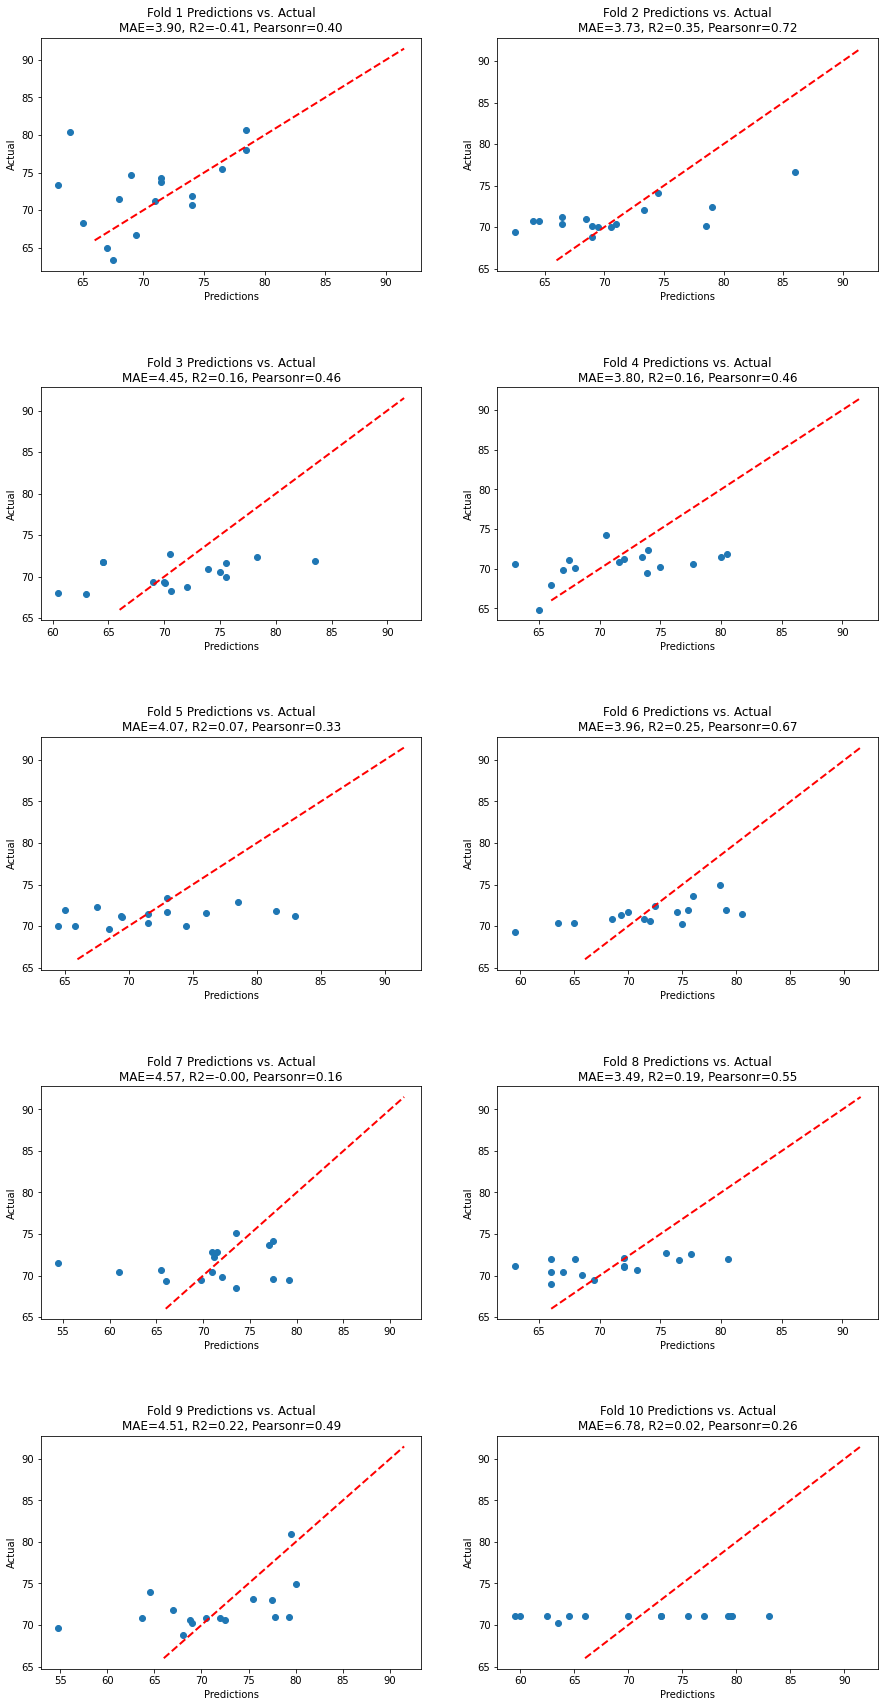

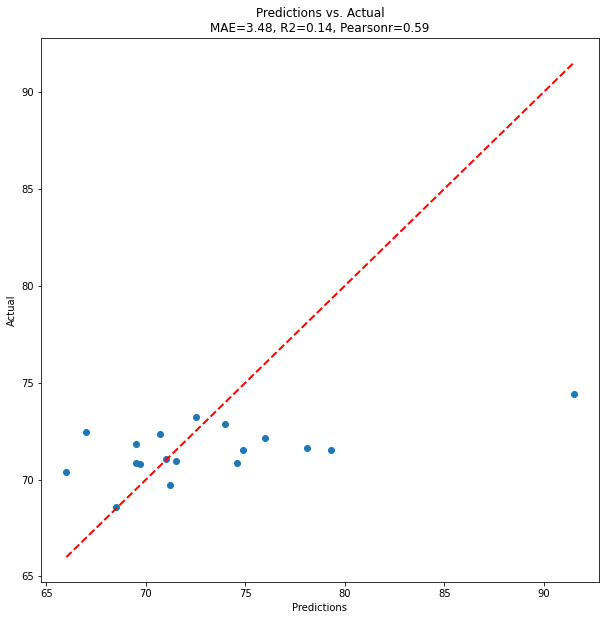

In [120]:
svm_model = svm_cv(X,y)

Validation MAE: 4.486 (0.827)
Validation R2: 0.011 (0.336)
Validation Pearsonr: 0.356 (0.228)
Test MAE: 3.478
Test R2: 0.139
Test Pearsonr: 0.587
[74.42228126 70.96480527 73.21388451 72.8881395  70.83893434 71.81897987
 70.39411053 72.14634438 72.46352287 71.07359929 71.61649281 71.51733307
 68.59629229 71.54169777 72.35021003 70.8281288  70.84723412 69.73025016]


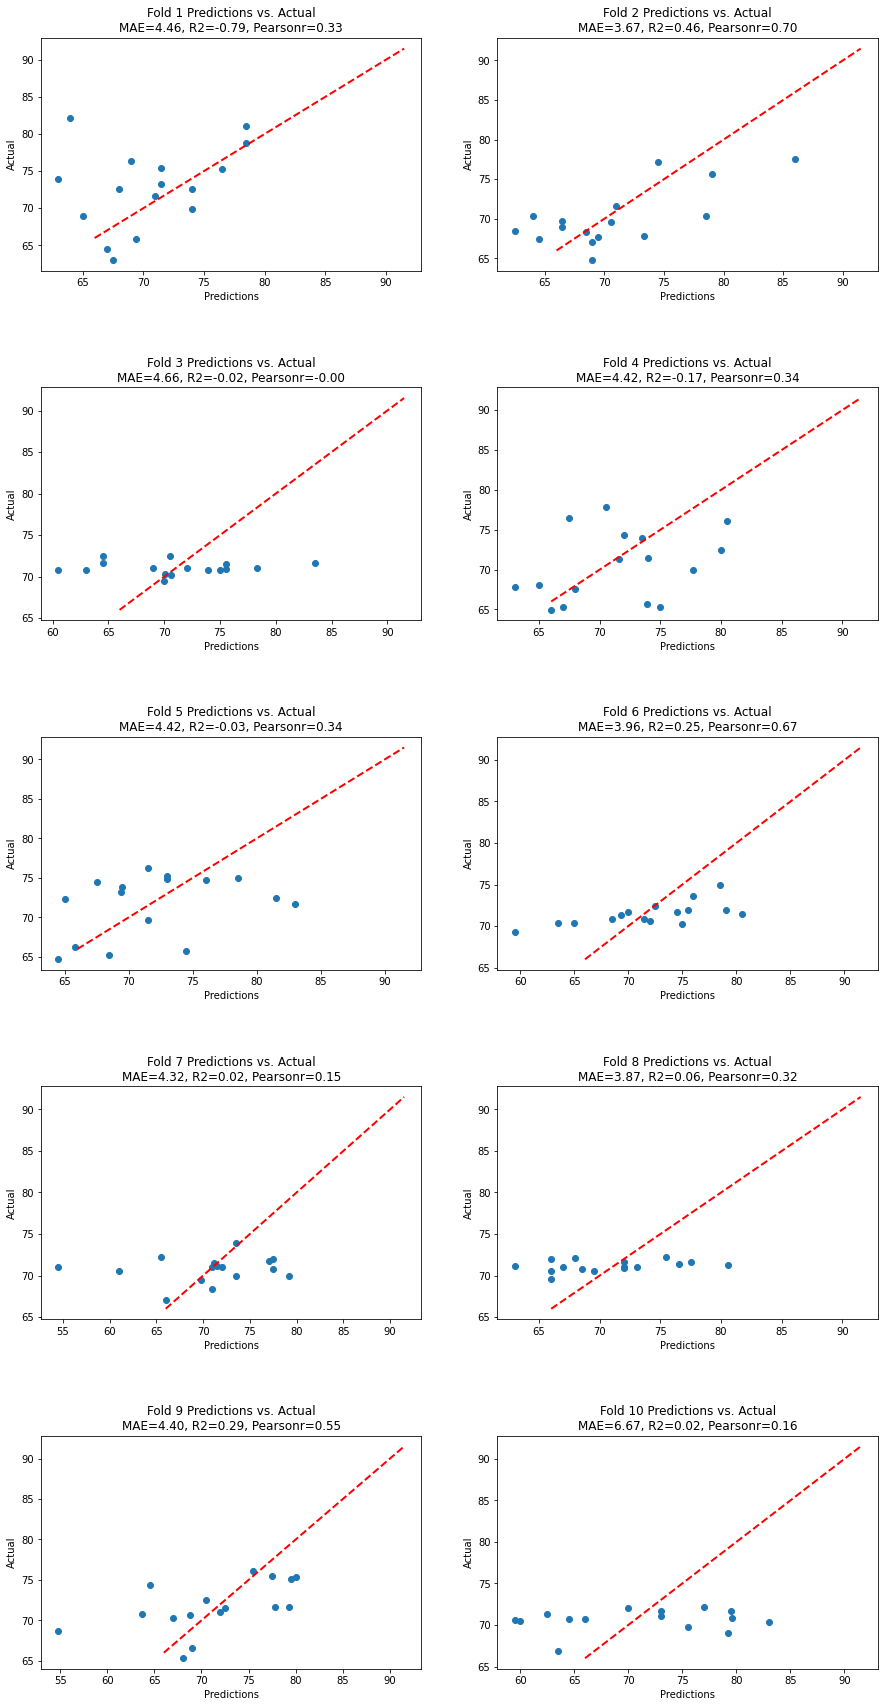

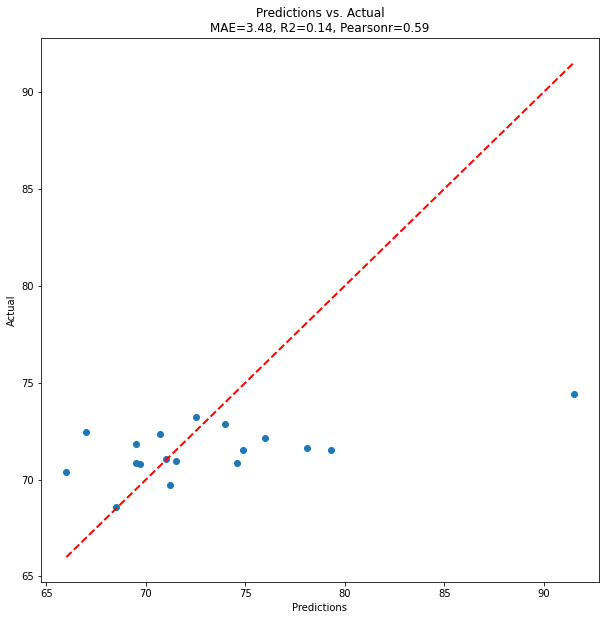

In [12]:
svm_model = svm_cv(X,y)

In [13]:
joblib.dump(svm_model, '../models/200423_svm_model.joblib')

['../models/200423_svm_model.joblib']